In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
%%bash
cd resource
ls

Bengaluru_House_Data.csv
Book1.xlsx
Muster_COMP503_2021-22.xlsx
SAN.xlsx
area.xlsx
att.txt
attendence1.csv
attendence2.csv
attendence3.csv
carprice.csv
dspam.xlsx
insrnc.xlsx
logistic_regression_result.csv
meetingAttendanceList
meetingAttendanceList 1
meetingAttendanceList 2
predication.csv
price.xlsx
realprice.xlsx
sarea.xlsx
~$dspam.xlsx


In [5]:
dfh=pd.read_csv('resource/Bengaluru_House_Data.csv')

In [7]:
dfh

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [8]:
dfh.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
dfh.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [10]:
df=dfh.drop(['availability','society','area_type','balcony'],axis=1)

In [11]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df1=df.dropna()

In [17]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [20]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df1['bhk']=df1['size'].apply( lambda x: int(x.split(' ')[0]))

<ipython-input-21-096fa3463f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk']=df1['size'].apply( lambda x: int(x.split(' ')[0]))


In [22]:
df1

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [23]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df1[~df1.total_sqft.apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [31]:
def ctn(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return ((float(tokens[0])+ float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [32]:
df2=df1.copy()

In [33]:
df2.total_sqft=df2['total_sqft'].apply(ctn)

In [35]:
df2.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [36]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [37]:
dfn= df2.copy()

In [38]:
dfn['price_per_sqft']=dfn.price*100000/dfn.total_sqft

In [39]:
dfn

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [40]:
len(dfn.location.unique())

1304

In [43]:
dfn.location=dfn.location.apply( lambda x: x.strip())

In [58]:
los=dfn.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [59]:
los

location
others              2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
LB Shastri Nagar      11
Marsur                11
Narayanapura          11
Nehru Nagar           11
HAL 2nd Stage         11
Name: location, Length: 242, dtype: int64

In [60]:
len(los)

242

In [52]:
llt=los[los<=10]

In [53]:
llt

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [55]:
dfn.location=dfn.location.apply(lambda x: 'others' if x in llt else x)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [61]:
dfn[dfn.total_sqft/dfn.bhk < 250]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13221,others,9 Bedroom,1178.0,9.0,75.0,9,6366.723260
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [62]:
df4=dfn[~(dfn.total_sqft/dfn.bhk < 250)]

In [63]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [64]:
df4.price_per_sqft.describe()

count     12588.000000
mean       6352.843657
std        4209.946717
min         267.829813
25%        4216.696674
50%        5302.169502
75%        6969.337210
max      176470.588235
Name: price_per_sqft, dtype: float64

In [65]:
def cleaner(df):
    dfo=pd.DataFrame()
    for key,sdf in df.groupby('location'):
        m=np.mean(sdf.price_per_sqft)
        s=np.std(sdf.price_per_sqft)
        rdf=sdf[(sdf.price_per_sqft> (m-s))&(sdf.price_per_sqft< (m+s))]
        dfo=pd.concat([dfo,rdf],ignore_index=True)
    return dfo

df5=cleaner(df4)

In [86]:
df5.shape

(10391, 7)

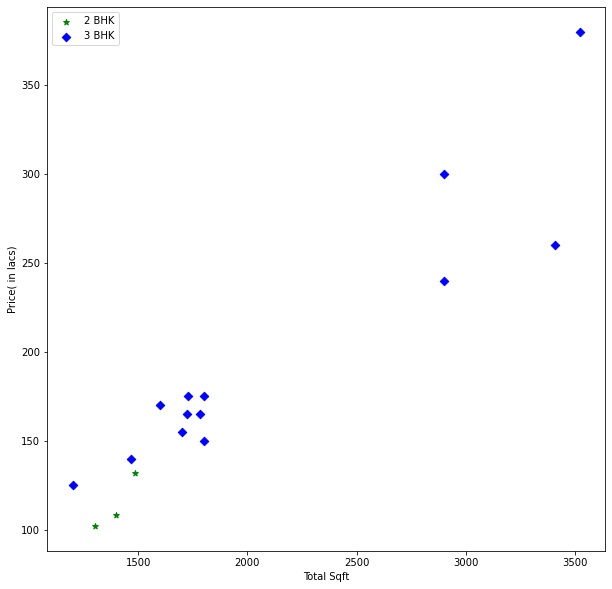

In [81]:
def pcs(df,location):
    b2=df[(df.location==location)&(df.bhk==2)]
    b3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(10,10)
    plt.scatter(b2.total_sqft,b2.price, color='green',label='2 BHK',marker='*')
    plt.scatter(b3.total_sqft,b3.price, color='blue',label='3 BHK',marker='D')
    plt.legend()
    plt.xlabel('Total Sqft')
    plt.ylabel('Price( in lacs)')
pcs(df5,'Hebbal Kempapura')

In [82]:
def cleaner1(df):
    ei=np.array([])
    for l,ld in df.groupby('location'):
        bs={}
        for bhk, bhkd in ld.groupby('bhk'):
            bs[bhk]= {
                'mean': np.mean(bhkd.price_per_sqft),
                'std': np.std(bhkd.price_per_sqft),
                'count': bhkd.shape[0]
            }
        for bhk, bhkd in ld.groupby('bhk'):
            st=bs.get(bhk-1)
            if st and st['count']>5:
                ei=np.append(ei,bhkd[bhkd.price_per_sqft<(st['mean'])].index.values)
        return df.drop(ei,axis='index')

In [85]:
df6=cleaner1(df5)
df6.shape

(10391, 7)

Text(0, 0.5, 'Count')

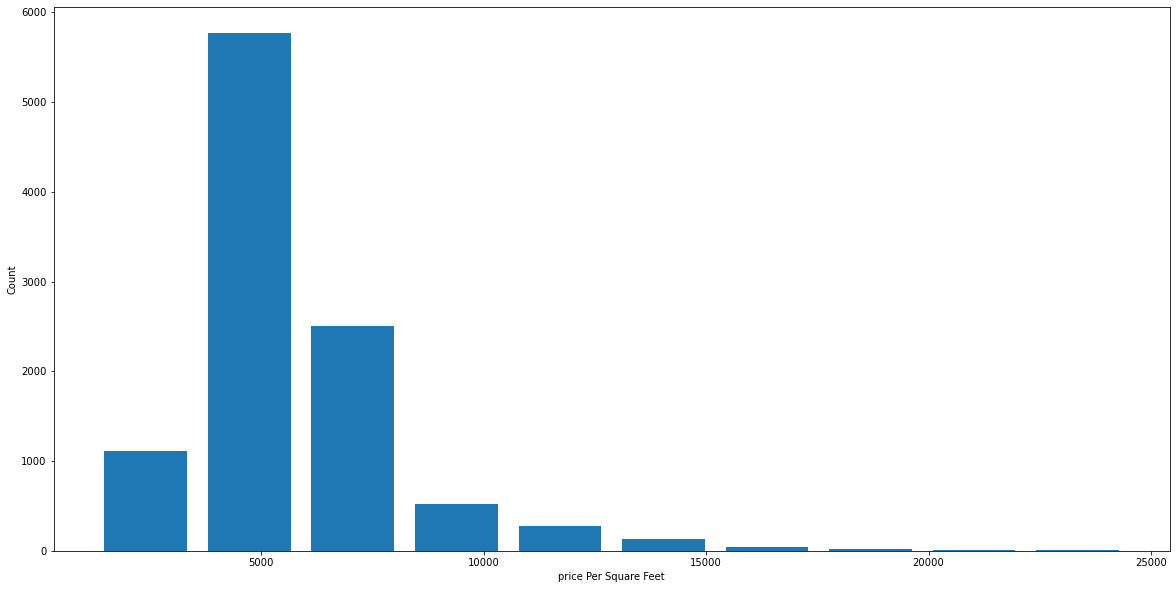

In [91]:
import matplotlib 
matplotlib.rcParams['figure.figsize']=('20,10')
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("price Per Square Feet")
plt.ylabel('Count')

In [132]:
#There are more than 6 models
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso
from sklearn.tree import DecisionTreeRegressor,ExtraTreeClassifier
from sklearn.svm import SVC,NuSVC,LinearSVC

Text(0, 0.5, 'Count')

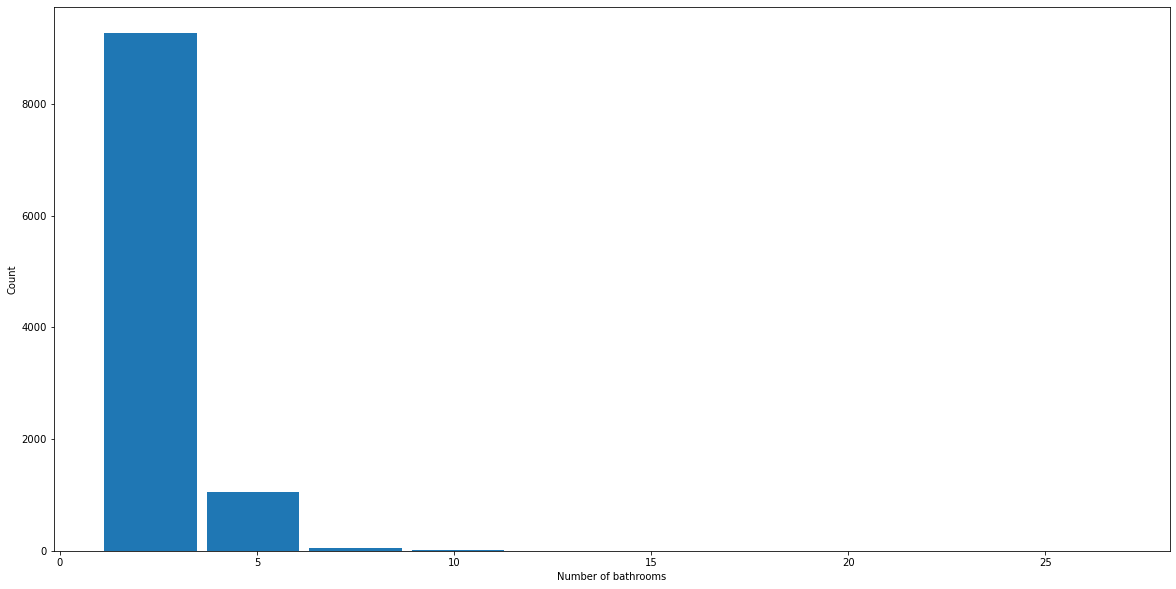

In [96]:
plt.hist(df6.bath,rwidth=0.9)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [104]:
df7= df6[df6.bath<df6.bhk+2]

In [105]:
df7.shape

(10294, 7)

In [102]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1534,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1667,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5322,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6815,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8531,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [106]:
df8=df7.drop(['size','price_per_sqft'],axis=1)

In [108]:
dm=pd.get_dummies(df8.location)

In [109]:
dm

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
df9=pd.concat([df8.drop('location',axis=1),dm.drop('others',axis=1)],axis='columns')

In [112]:
df9

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1353.0,2.0,110.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10387,812.0,1.0,26.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10388,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10389,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
x= df9.drop('price', axis='columns')
y= df9.price

In [121]:
from sklearn.model_selection import train_test_split as tts
xtr,xts,ytr,yts= tts(x,y,test_size=0.2,random_state=10)

In [124]:
clr=LinearRegression()
clr.fit(xtr,ytr)
clr.score(xts,yts)
clr.score(xtr,ytr)

0.8232197256075805

In [180]:
from sklearn.model_selection import ShuffleSplit as ss
from sklearn.model_selection import cross_val_score as cvs
cv= ss(n_splits=5,test_size=0.2, random_state=10)
cvs(LinearRegression(),x,y,cv=cv).max()

0.8482382892747553

In [178]:
from sklearn.model_selection import GridSearchCV as gscv
def bmodel(x,y):
    algos= {
        'lr' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'dtree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
    }
    scrs=[]
    cv=ss(n_splits=5, test_size=0.2, random_state=0)
    for a,c in algos.items():
        gs=gscv(c['model'],c['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scrs.append({
            'model':a,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scrs,columns=['model','best_score','best_params'])

In [181]:
bmodel(x,y)

,model,best_score,best_params
0,lr,0.808587,{'normalize': False}
1,lasso,0.692450,"{'alpha': 1, 'selection': 'random'}"
2,dtree,0.665704,"{'criterion': 'mse', 'splitter': 'random'}"


In [160]:
algos= {
        'lr' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'dtree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

In [182]:
df.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [184]:
def prediction(location,sqft,bath,bhk):
    li=np.where(x.columns==location)[0][0]
    xn=np.zeros(len(x.columns))
    xn[0]=sqft
    xn[1]=bath
    xn[2]=bhk
    if li>=0:
        xn[li]=1
        
    return clr.predict([xn])[0]


In [185]:
prediction('Electronic City Phase II',2000, 4, 2)

116.95331713553799

In [186]:
prediction('Electronic City Phase II',2000, 3, 2)

111.46459878667608

In [188]:
prediction('Electronic City Phase II',2000, 2, 1)

113.00721384878304

In [189]:
prediction('Electronic City Phase II',2000, 5, 3)

115.41070207343105

In [190]:
prediction('Electronic City Phase II',1900, 4, 2)

109.55358457015569

In [191]:
prediction('Electronic City Phase II',2500, 4, 2)

153.9519799624494

In [192]:
l

247.7974338232268

In [193]:
import pickle
with open('homePricePredictionModel.pickle', 'wb') as f:
    pickle.dump(clr,f)

In [194]:
import json 
columns= {
    'data_columns': [col.lower() for col in x.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [195]:
ls

 Volume in drive F is New Volume
 Volume Serial Number is A4D0-025F

 Directory of F:\Programs\PythonWork\jupyter_work

12-11-2021  21:57    <DIR>          .
04-11-2021  07:48    <DIR>          ..
12-11-2021  04:25    <DIR>          .ipynb_checkpoints
07-11-2021  14:13            50,669 7_logistic_regression_exercise.ipynb
11-11-2021  18:32            35,311 attendence.ipynb
12-11-2021  21:57             4,014 columns.json
09-11-2021  16:02             9,546 crosskfold.ipynb
07-11-2021  13:50            72,643 exercise.ipynb
08-11-2021  09:59            61,051 exercise_hr.ipynb
12-11-2021  21:55             4,358 homePricePredictionModel.pickle
12-11-2021  21:57           159,785 House Pricing .ipynb
10-11-2021  05:25    <DIR>          models
12-11-2021  04:19            88,750 practice6py.ipynb
07-11-2021  12:16           620,095 python_practice_3.ipynb
08-11-2021  05:32            97,346 python_practice_4.ipynb
10-11-2021  20:20           196,797 python_practice_5.ipynb
12-11-2021  0